In [1]:
## 行星数据集
# Seaborn 提供了一个名为 "planets" 的数据集，包含有关行星的各种信息。我们将使用这个数据集来演示 Pandas 的分组和累计操作。
# 我们将使用 Seaborn 加载行星数据集，并将其转换为 Pandas DataFrame 进行分析。
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 加载行星数据集
planets = sns.load_dataset('planets')

# 显示数据集的前几行
print("行星数据集的前几行:\n", planets.head())

# 2. 数据概览
print("\n数据集信息:")
print(planets.info())




行星数据集的前几行:
             method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

数据集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None


In [2]:
# 3. 分组操作
# 按 'method' 列分组，并计算每种方法的行星数量
grouped_by_method = planets.groupby('method').size().reset_index(name='count')
print("\n按方法分组的行星数量:\n", grouped_by_method)



按方法分组的行星数量:
                           method  count
0                     Astrometry      2
1      Eclipse Timing Variations      9
2                        Imaging     38
3                   Microlensing     23
4  Orbital Brightness Modulation      3
5                  Pulsar Timing      5
6    Pulsation Timing Variations      1
7                Radial Velocity    553
8                        Transit    397
9      Transit Timing Variations      4


In [3]:
# 4. 计算每种方法的行星平均质量
average_mass = planets.groupby('method')['mass'].mean().reset_index(name='average_mass')
print("\n按方法分组的平均质量:\n", average_mass)


按方法分组的平均质量:
                           method  average_mass
0                     Astrometry           NaN
1      Eclipse Timing Variations      5.125000
2                        Imaging           NaN
3                   Microlensing           NaN
4  Orbital Brightness Modulation           NaN
5                  Pulsar Timing           NaN
6    Pulsation Timing Variations           NaN
7                Radial Velocity      2.630699
8                        Transit      1.470000
9      Transit Timing Variations           NaN


In [4]:
# 5. 计算每种方法的行星数量和平均质量的合并结果
merged_group = pd.merge(grouped_by_method, average_mass, on='method')
print("\n合并后的结果:\n", merged_group)



合并后的结果:
                           method  count  average_mass
0                     Astrometry      2           NaN
1      Eclipse Timing Variations      9      5.125000
2                        Imaging     38           NaN
3                   Microlensing     23           NaN
4  Orbital Brightness Modulation      3           NaN
5                  Pulsar Timing      5           NaN
6    Pulsation Timing Variations      1           NaN
7                Radial Velocity    553      2.630699
8                        Transit    397      1.470000
9      Transit Timing Variations      4           NaN


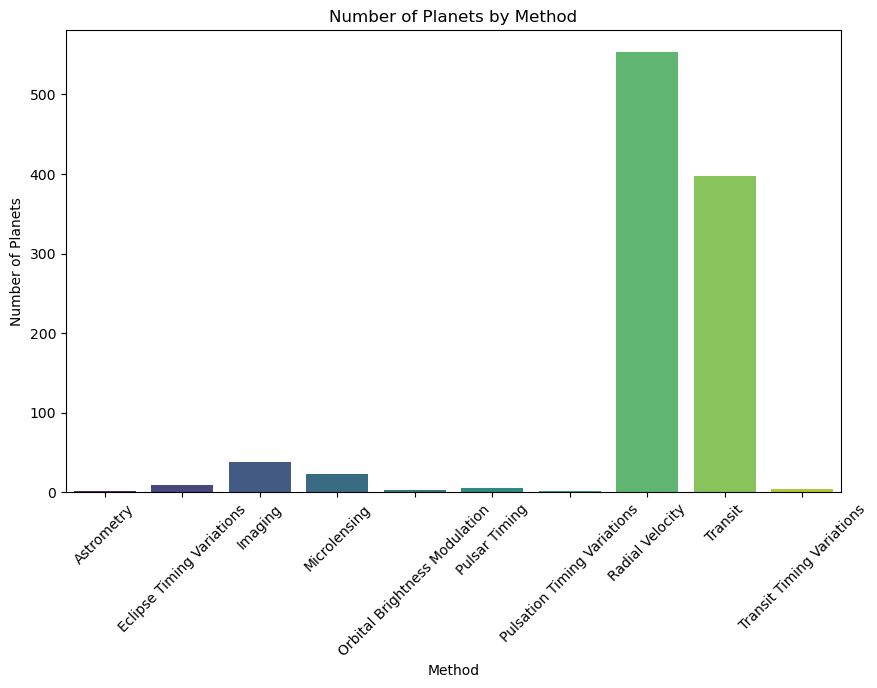

In [5]:
# 7. 可视化
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_group, x='method', y='count', palette='viridis', hue='method', legend=False)
plt.title('Number of Planets by Method')
plt.xlabel('Method')
plt.ylabel('Number of Planets')
plt.xticks(rotation=45)
plt.show()

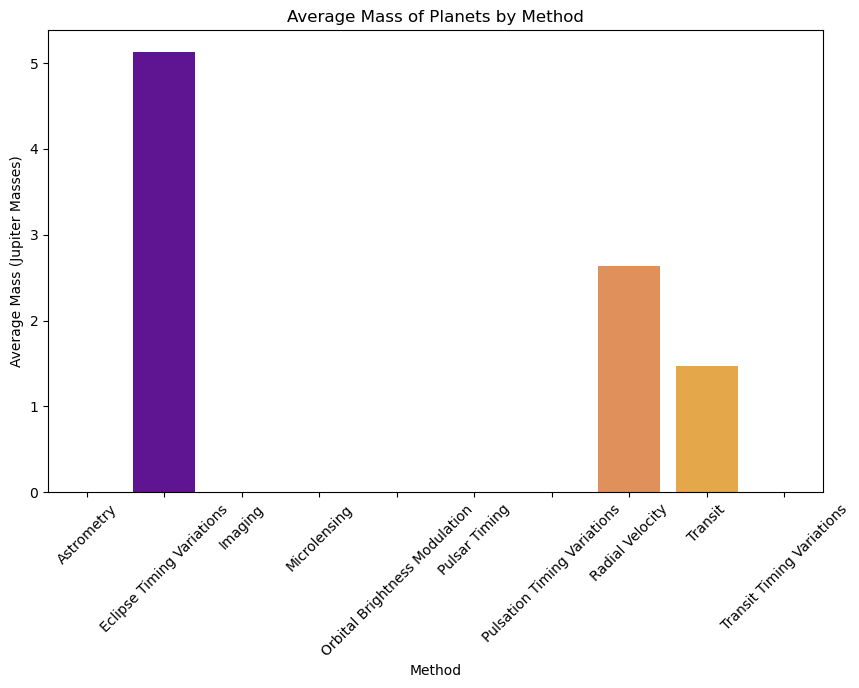

In [6]:
# 8. 可视化平均质量
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_group, x='method', y='average_mass', palette='plasma', hue='method', legend=False)
plt.title('Average Mass of Planets by Method')
plt.xlabel('Method')
plt.ylabel('Average Mass (Jupiter Masses)')
plt.xticks(rotation=45)
plt.show()

In [7]:
# 1. 数据清洗与预处理
# 检查缺失值
print(planets.isnull().sum())

# 删除缺失值（如果需要）
planets_cleaned = planets.dropna()


method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


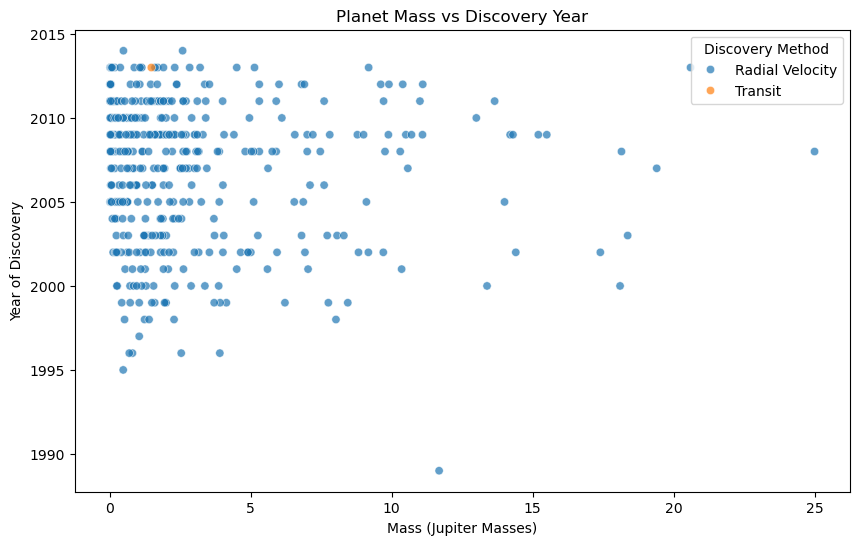

In [16]:
# 2. 数据探索性分析（EDA）

# 2.1. 行星质量与距离的关系
# 可以使用散点图来探索行星质量与距离之间的关系。
plt.figure(figsize=(10, 6))
sns.scatterplot(data=planets_cleaned, x='mass', y='year', hue='method', alpha=0.7)
plt.title('Planet Mass vs Discovery Year')
plt.xlabel('Mass (Jupiter Masses)')
plt.ylabel('Year of Discovery')
plt.legend(title='Discovery Method')
plt.show()


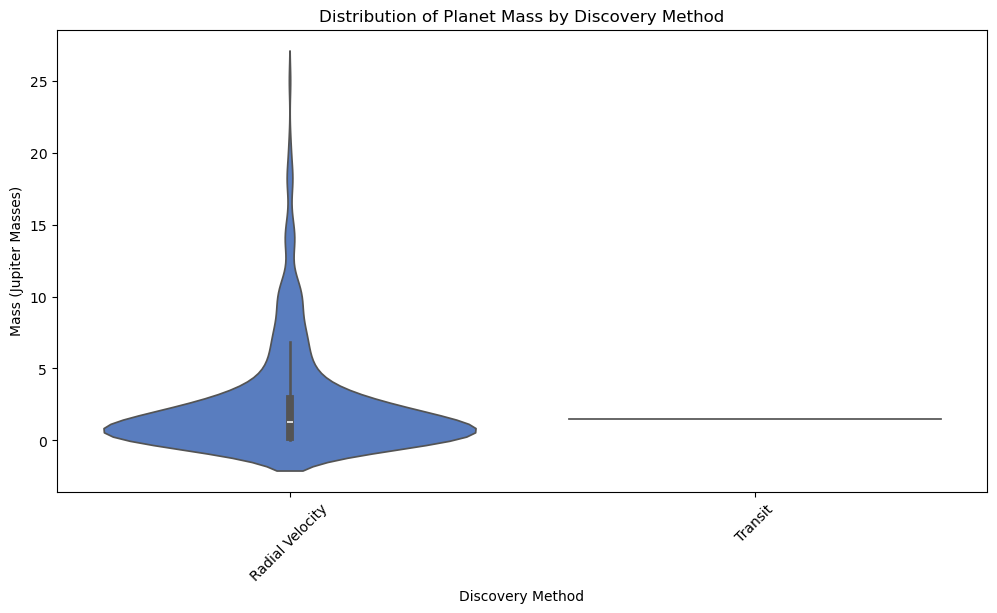

In [22]:
# 2.2. 不同发现方法的行星质量分布
# 使用小提琴图展示不同发现方法的行星质量分布。

plt.figure(figsize=(12, 6))
sns.violinplot(data=planets_cleaned, x='method', y='mass', palette='muted', hue='method', legend=False)
plt.title('Distribution of Planet Mass by Discovery Method')
plt.xlabel('Discovery Method')
plt.ylabel('Mass (Jupiter Masses)')
plt.xticks(rotation=45)
plt.show()


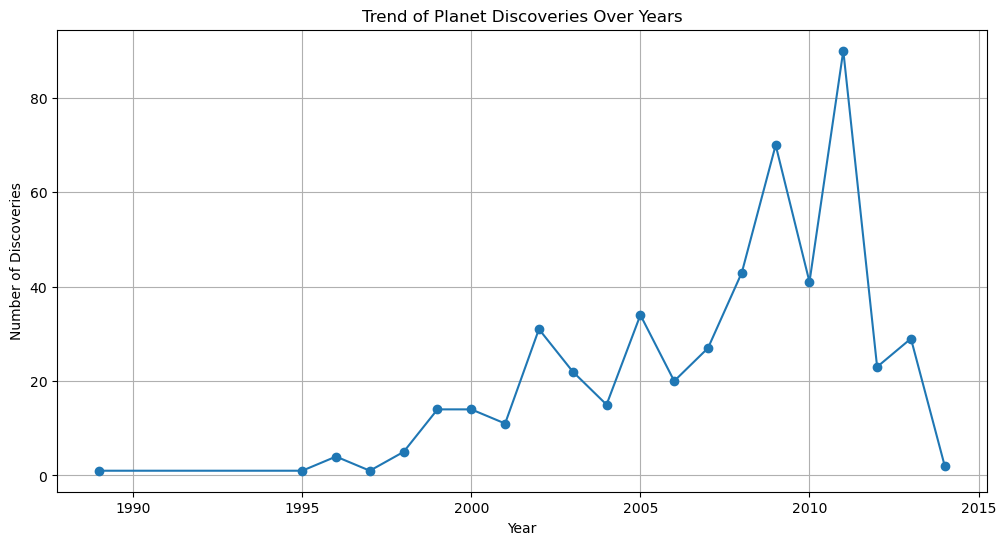

In [24]:
# 3. 时间序列分析
# 分析行星发现的时间趋势。
# 按年份统计行星发现数量
discovery_trend = planets_cleaned['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
discovery_trend.plot(kind='line', marker='o')
plt.title('Trend of Planet Discoveries Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Discoveries')
plt.grid()
plt.show()



缺失值统计:
 method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


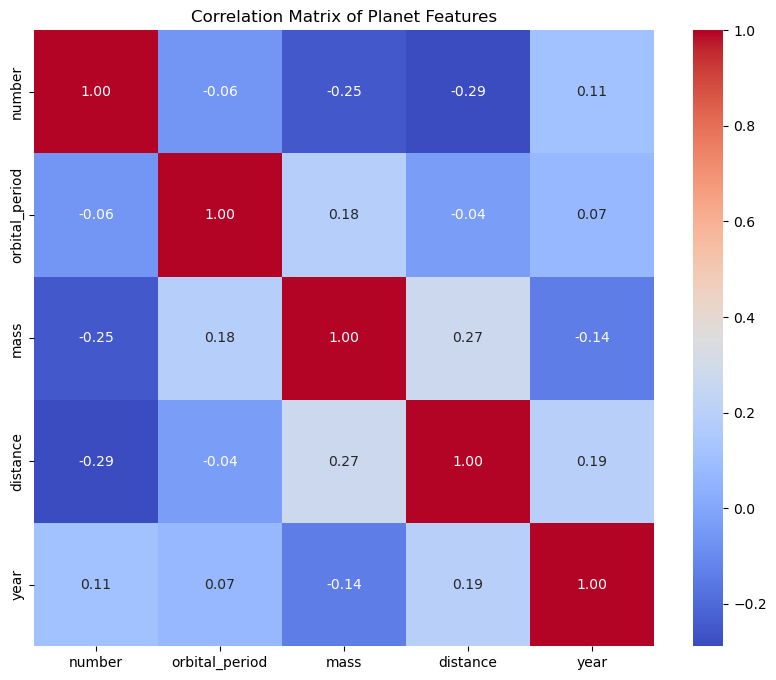

In [28]:
# 4.相关性分析   数据清洗：检查缺失值 删除缺失值（如果需要）

print("\n缺失值统计:\n", planets.isnull().sum())
planets_cleaned = planets.dropna()

# 4. 相关性分析
# 只选择数值列进行相关性分析
numeric_cols = planets_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = planets_cleaned[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Planet Features')
plt.show()


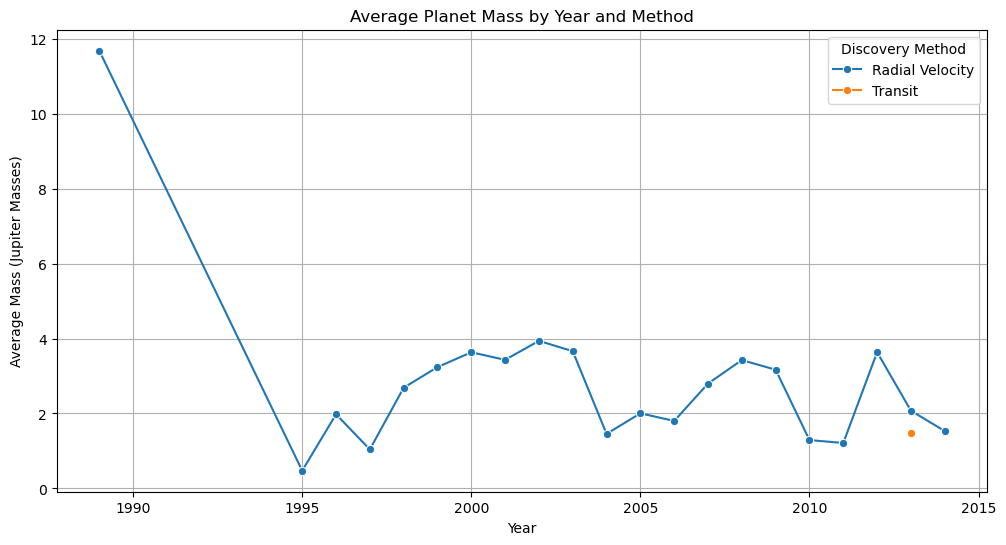

In [30]:
## 5. 高级分组与聚合 可以对数据进行更复杂的分组和聚合操作，例如按发现年份和方法分组，计算每组的平均质量。

# 按年份和方法分组，计算平均质量
grouped_by_year_method = planets_cleaned.groupby(['year', 'method']).agg({'mass': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_by_year_method, x='year', y='mass', hue='method', marker='o')
plt.title('Average Planet Mass by Year and Method')
plt.xlabel('Year')
plt.ylabel('Average Mass (Jupiter Masses)')
plt.legend(title='Discovery Method')
plt.grid()
plt.show()



Mean Squared Error: 0.00
